In [2]:
import cv2

In [4]:
# load the input image and display it to our screen
img_rgb = cv2.imread('Image_2.png')

In [7]:
# load the input image and display it to our screen
img_rgb = cv2.imread('Image_2.png')
cv2.imshow("Original", img_rgb)
# cropping an image with OpenCV is accomplished via simple NumPy
# array slices in startY:endY, startX:endX order -- here we are
# cropping the face from the image (these coordinates were
# determined using photo editing software such as Photoshop,
# GIMP, Paint, etc.)
face = img_rgb[85:250, 85:220]
cv2.imshow("Face", face)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2
img = cv2.imread("Image_2.png")
h, w, c = img.shape
print('width:  ', w)
print('height: ', h)
print('channel:', c)

width:   1920
height:  1080
channel: 3


In [ ]:
https://www.geeksforgeeks.org/displaying-the-coordinates-of-the-points-clicked-on-the-image-using-python-opencv/

In [ ]:
https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

In [1]:
def imcrop(img, bbox): 
    x1,y1,x2,y2 = bbox
    if x1 < 0 or y1 < 0 or x2 > img.shape[1] or y2 > img.shape[0]:
        img, x1, x2, y1, y2 = pad_img_to_fit_bbox(img, x1, x2, y1, y2)
    return img[y1:y2, x1:x2, :]

def pad_img_to_fit_bbox(img, x1, x2, y1, y2):
    img = np.pad(img, ((np.abs(np.minimum(0, y1)), np.maximum(y2 - img.shape[0], 0)),
               (np.abs(np.minimum(0, x1)), np.maximum(x2 - img.shape[1], 0)), (0,0)), mode="constant")
    y1 += np.abs(np.minimum(0, y1))
    y2 += np.abs(np.minimum(0, y1))
    x1 += np.abs(np.minimum(0, x1))
    x2 += np.abs(np.minimum(0, x1))
    return img, x1, x2, y1, y2

In [ ]:
imcrop(img_rgb, bbox)

In [9]:
import cv2
img_rgb = cv2.imread('Image_2.png')

In [10]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
template = cv2.imread('template-2.png', cv2.IMREAD_GRAYSCALE)

In [11]:
w, h = template.shape
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
_, _, _, maxLoc=cv2.minMaxLoc(res)
cv2.rectangle(img_rgb, maxLoc, (maxLoc[0]+h, maxLoc[1]+w), (0, 255, 255), 2)
cv2.imshow('Detected', img_rgb)
crop_img = img_rgb[maxLoc[1]:maxLoc[1]+w, maxLoc[0]:maxLoc[0]+h, :] 
cv2.imshow("cropped", crop_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Crop Image with OpenCV
In the first part of this tutorial, we’ll discuss how we represent OpenCV images as NumPy arrays. Since each image is a NumPy array, we can leverage NumPy array slicing to crop an image.

From there, we’ll configure our development environments and review our project directory structure.

I’ll then demonstrate how simple it is to crop images with OpenCV!

Understanding image cropping with OpenCV and NumPy array slicing

Figure 1: We accomplish image cropping by using NumPy array slicing (image source).
When we crop an image, we want to remove the outer parts of the image we are not interested in. We commonly refer to this process as selecting our Region of Interest, or more simply, our ROI.

We can accomplish image cropping by using NumPy array slicing.

Let’s start by initializing a NumPy list with values ranging from [0, 24]:
https://www.pyimagesearch.com/2021/01/19/crop-image-with-opencv/

https://github.com/tensorflow/models/tree/master/research/deeplab

https://www.analyticsvidhya.com/blog/2021/07/learn-how-to-do-real-time-background-replacement-using-opencv-and-cvzone/

https://towardsdatascience.com/transformations-with-opencv-ff9a7bea7f8b

In [67]:
#import cv2
#import numpy as np

# Read images : src image will be cloned into dst
#im = cv2.imread("Image_2.png")
#obj= cv2.imread("template-2.png")

# Create an all white mask
#mask = 255 * np.ones(obj.shape, obj.dtype)

# The location of the center of the src in the dst
#width, height, channels = im.shape
#center = (height/2, width/2)

# Seamlessly clone src into dst and put the results in output
#normal_clone = cv2.seamlessClone(obj, im, mask, center, cv2.NORMAL_CLONE)
#mixed_clone = cv2.seamlessClone(obj, im, mask, center, cv2.MIXED_CLONE)

# Write results
#cv2.imwrite("opencv-normal-clone-example.jpg", normal_clone)
#cv2.imwrite("opencv-mixed-clone-example.jpg", mixed_clone)

In [81]:
#https://stackoverflow.com/questions/68089067/opencv-python-remove-certain-objects-in-an-image
import cv2
import numpy as np
import time

start = time.time()
threshold = 0.4
image = cv2.imread('Image_2.png')
imageG = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#template = cv2.imread('template.jpg', 0)
template = cv2.imread('template-2.png', 0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(imageG,template,cv2.TM_CCOEFF_NORMED)
loc = np.where( res >= threshold)

In [82]:
mask = np.zeros_like(imageG)
for pt in zip(*loc[::-1]):
    #a = cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
    cv2.rectangle(mask, (pt[0]+3, pt[1]+3), (pt[0]+w-3, pt[1]+h-3), 255, -1)  # Reduce the size of the rectangle by 3 pixels from each side

image = cv2.inpaint(image, mask, 2, cv2.INPAINT_NS)

cv2.imshow('lag.jpg', image)
cv2.imshow('mask', mask)
end = time.time()
final = end - start
print(final)
cv2.waitKey(0)
cv2.destroyAllWindows()

0.32564687728881836


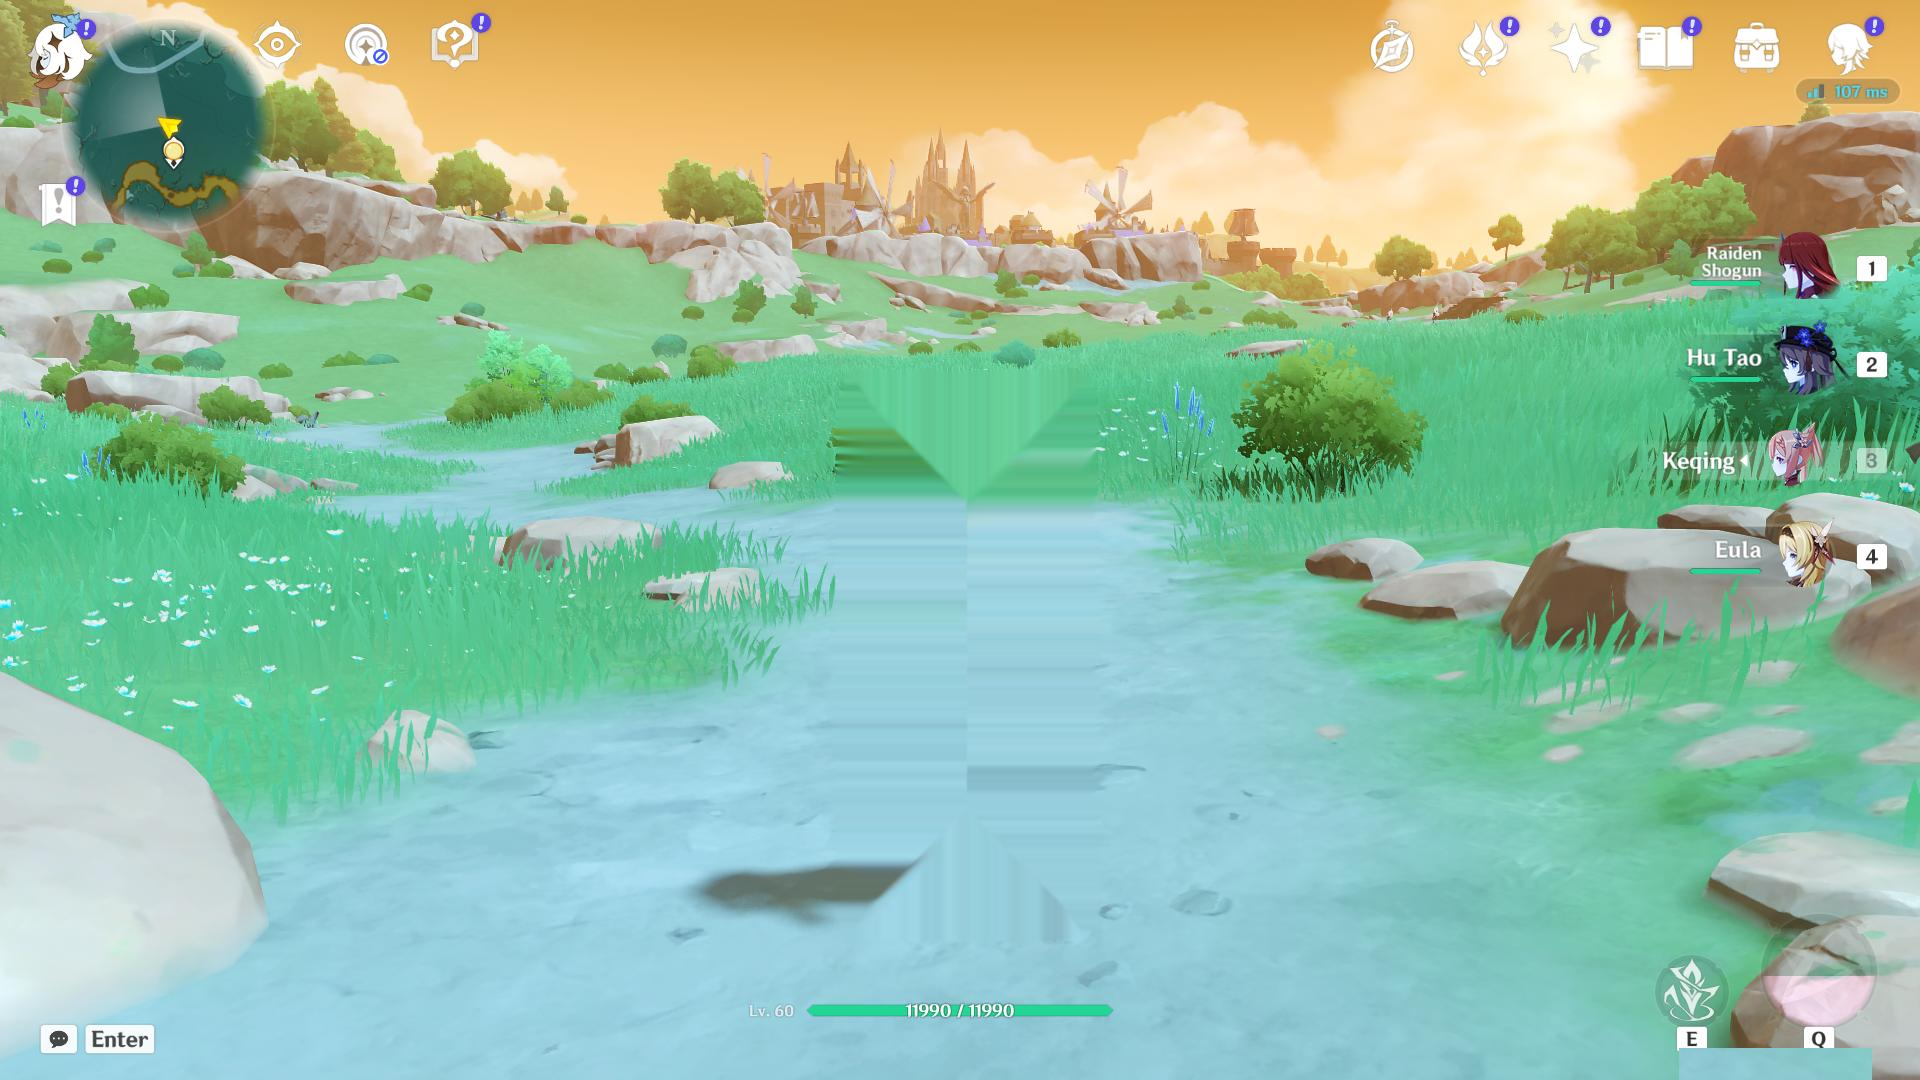

In [83]:
showarray(image)

In [84]:
import io
import cv2
import numpy as np
from IPython.display import clear_output, Image, display
import PIL.Image
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

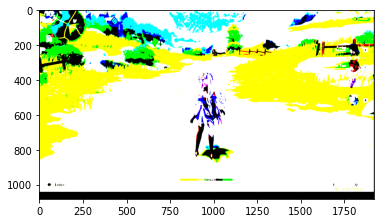

In [85]:
import cv2 as cv
import numpy as np
from numpy import load
from matplotlib import pyplot as plt
#img = cv.imread('2.png',0)
img = load('data.npy') #Original
# Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
img = cv.medianBlur(img,5)
# Simple threshold
ret,th1 = cv.threshold(img,121,255,cv.THRESH_BINARY)
plt.imshow(th1,'gray')

In [3]:
from numpy import asarray
from numpy import save
record2=False
if record2 == True :
    # save to npy file
    save('data_prepro.npy', th1)

In [5]:
import cv2
import numpy as np
frame = load('data_prepro.npy')#Original preprocessed

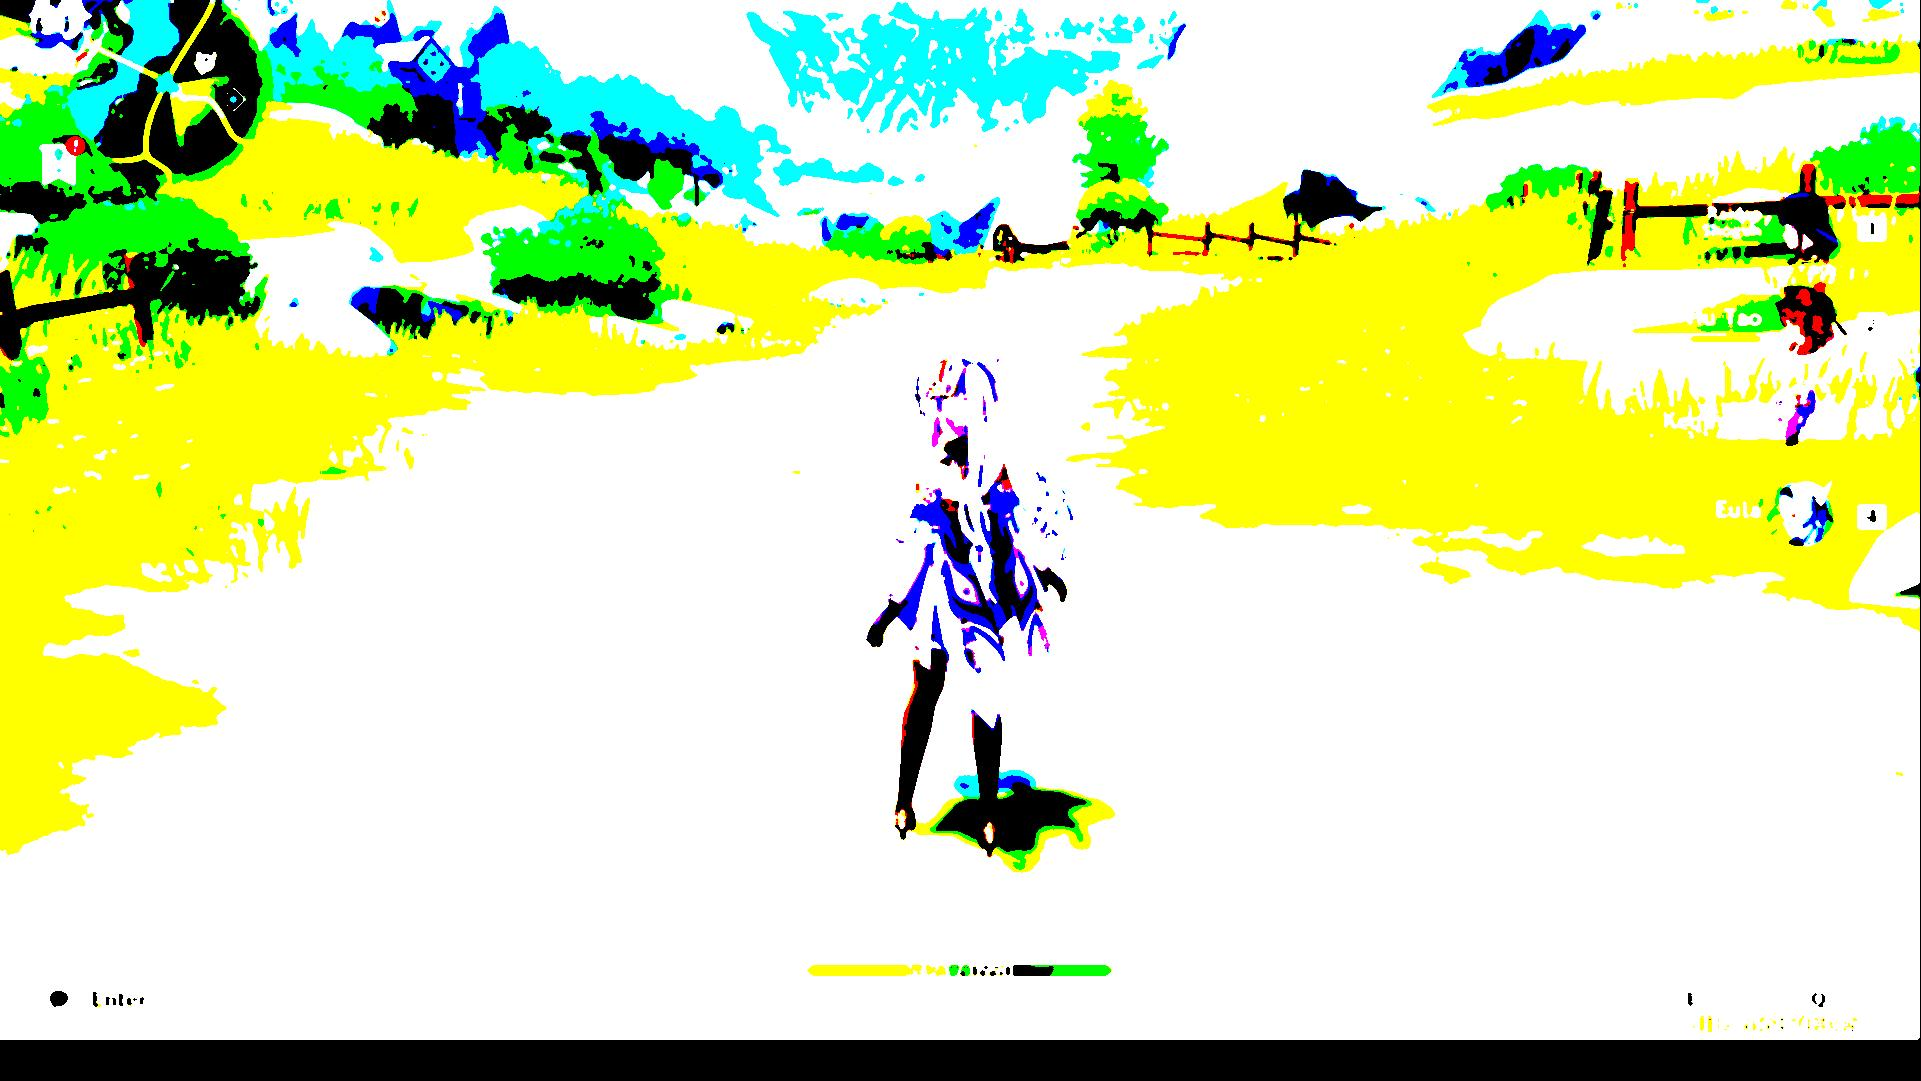

In [8]:
showarray(frame)

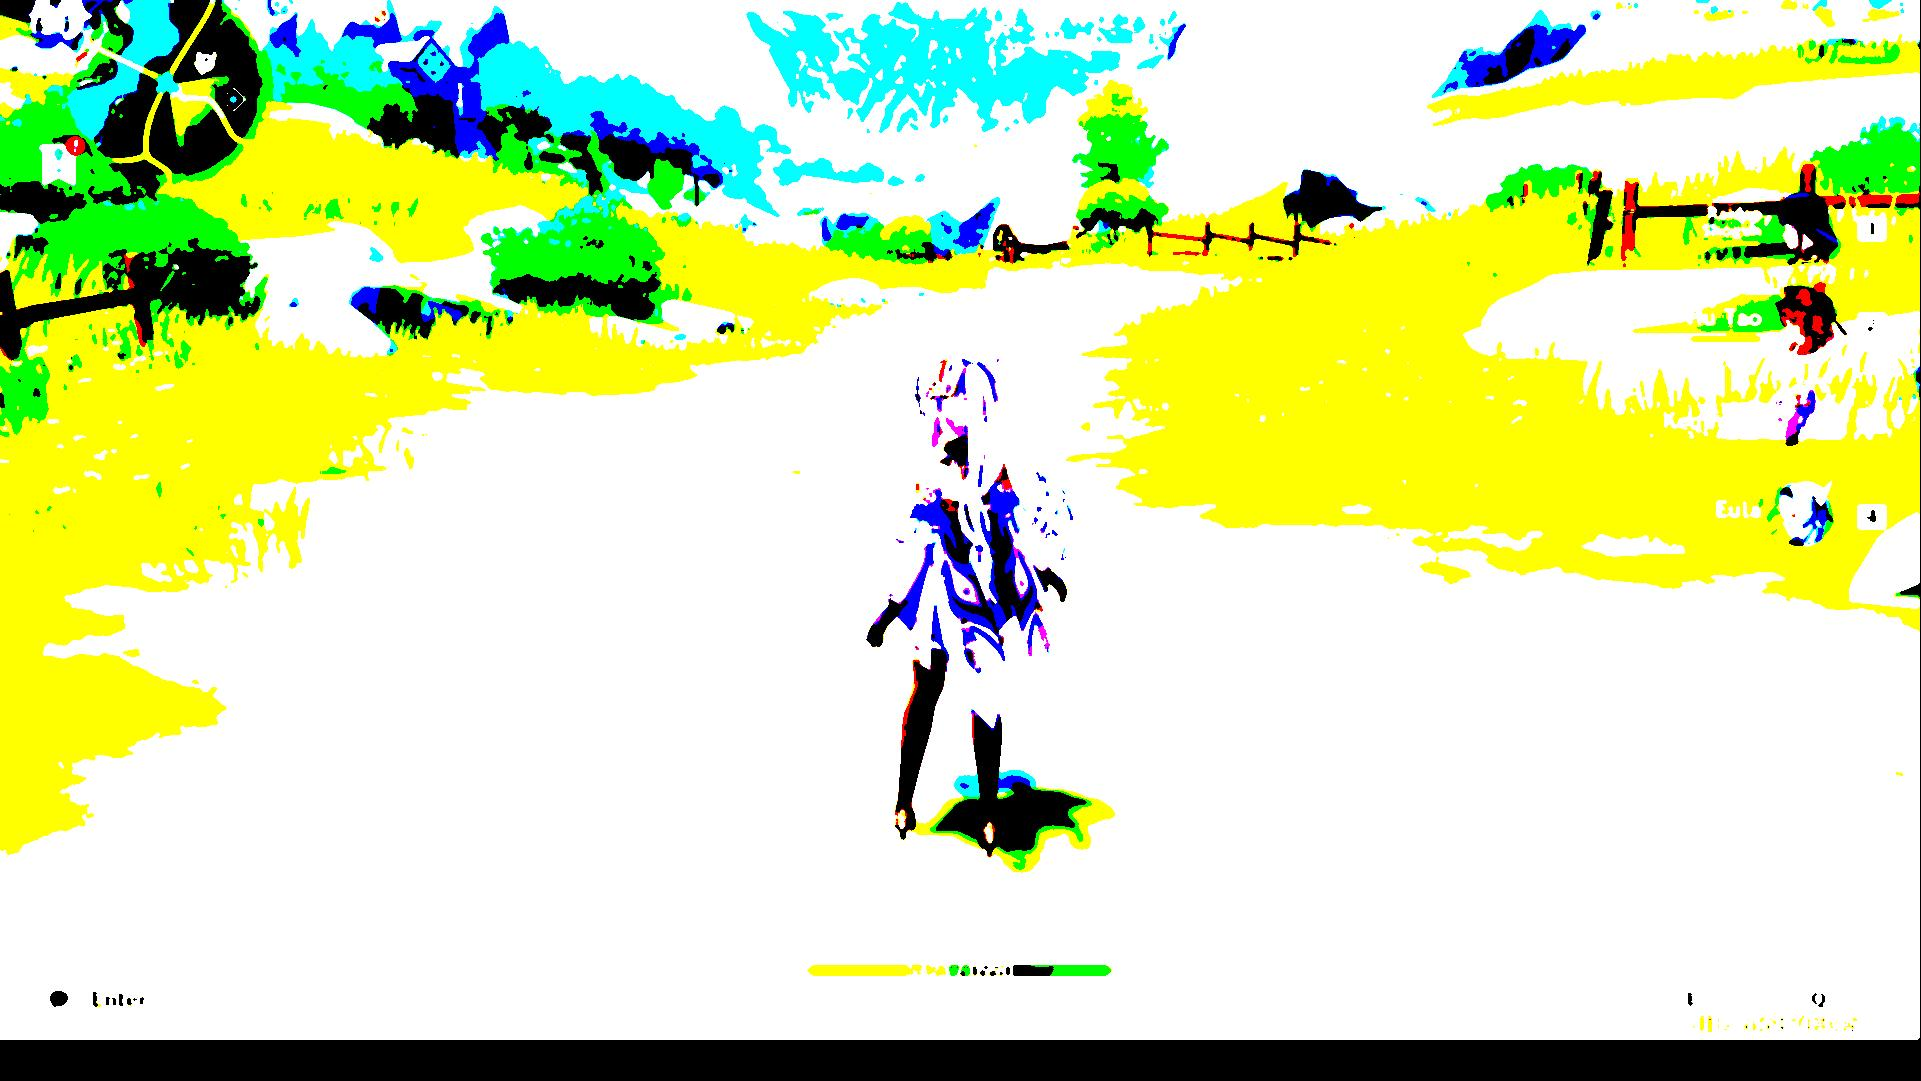

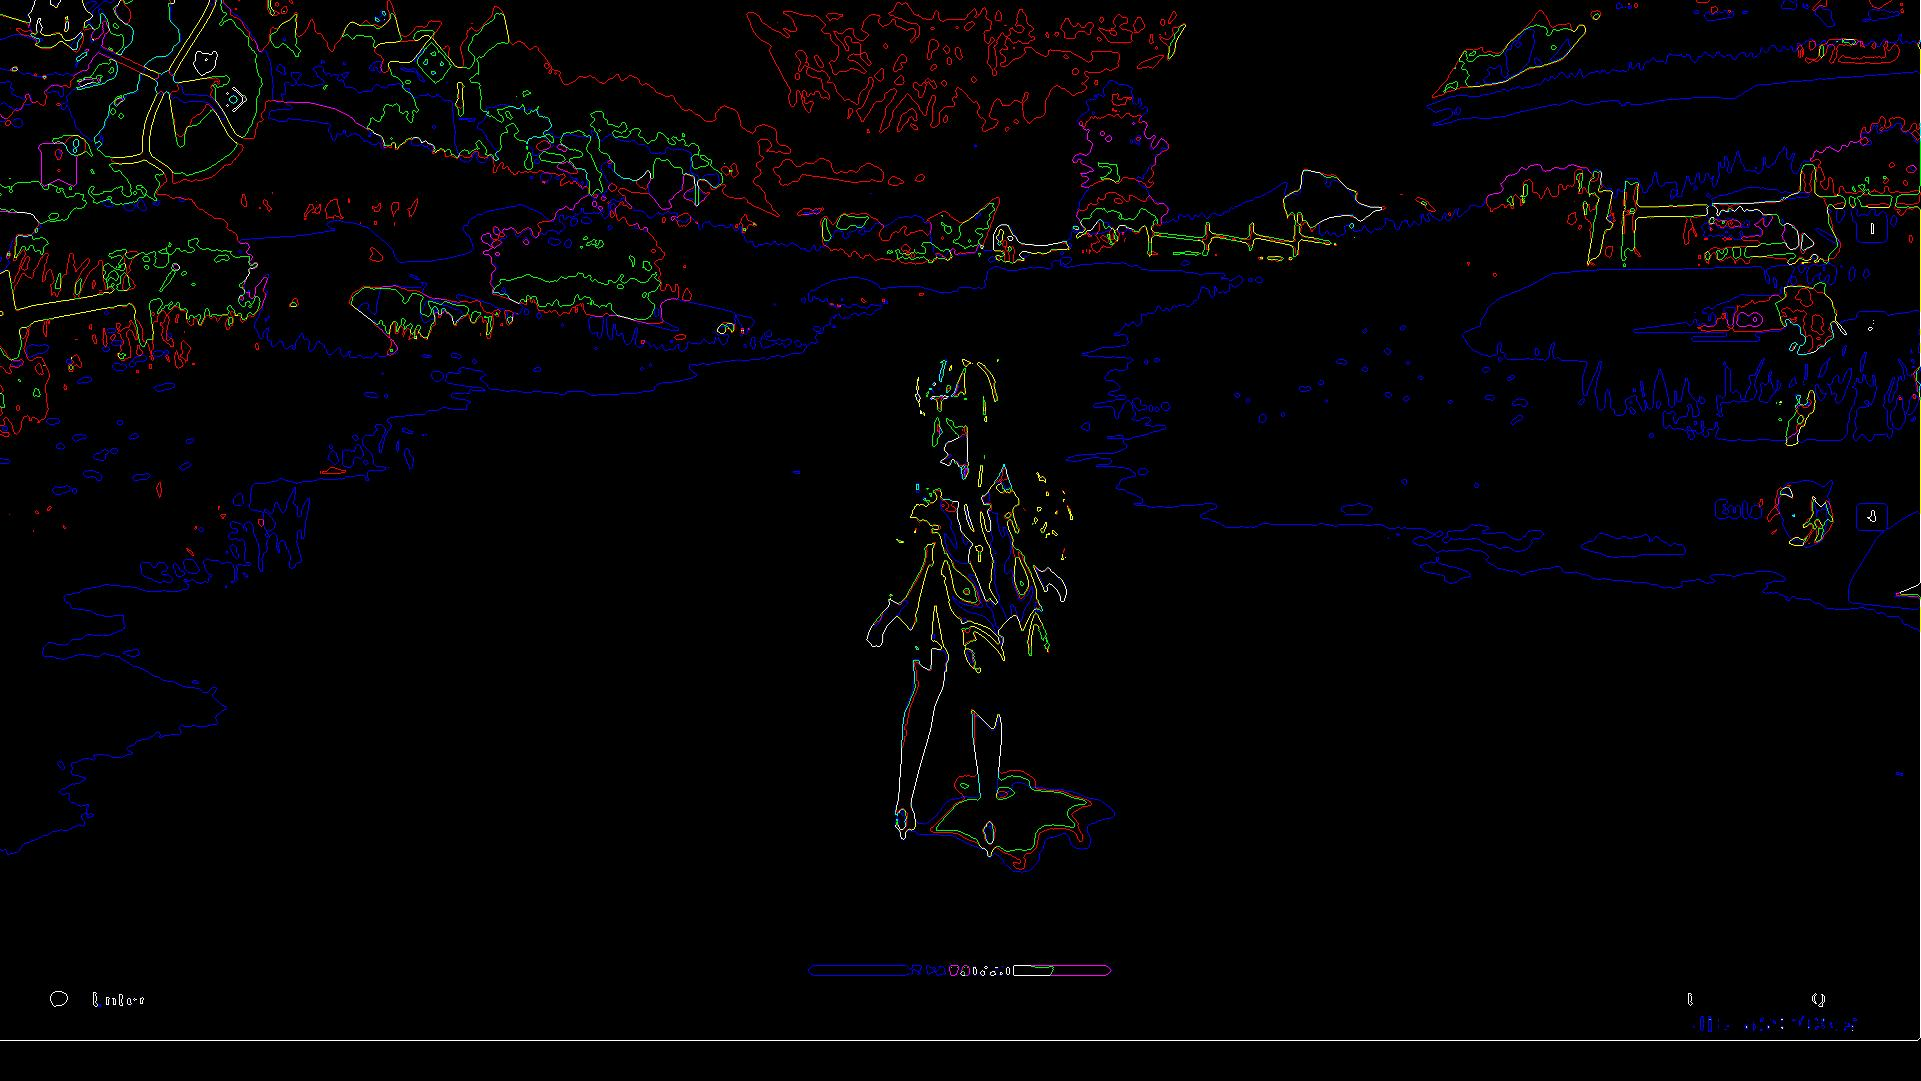

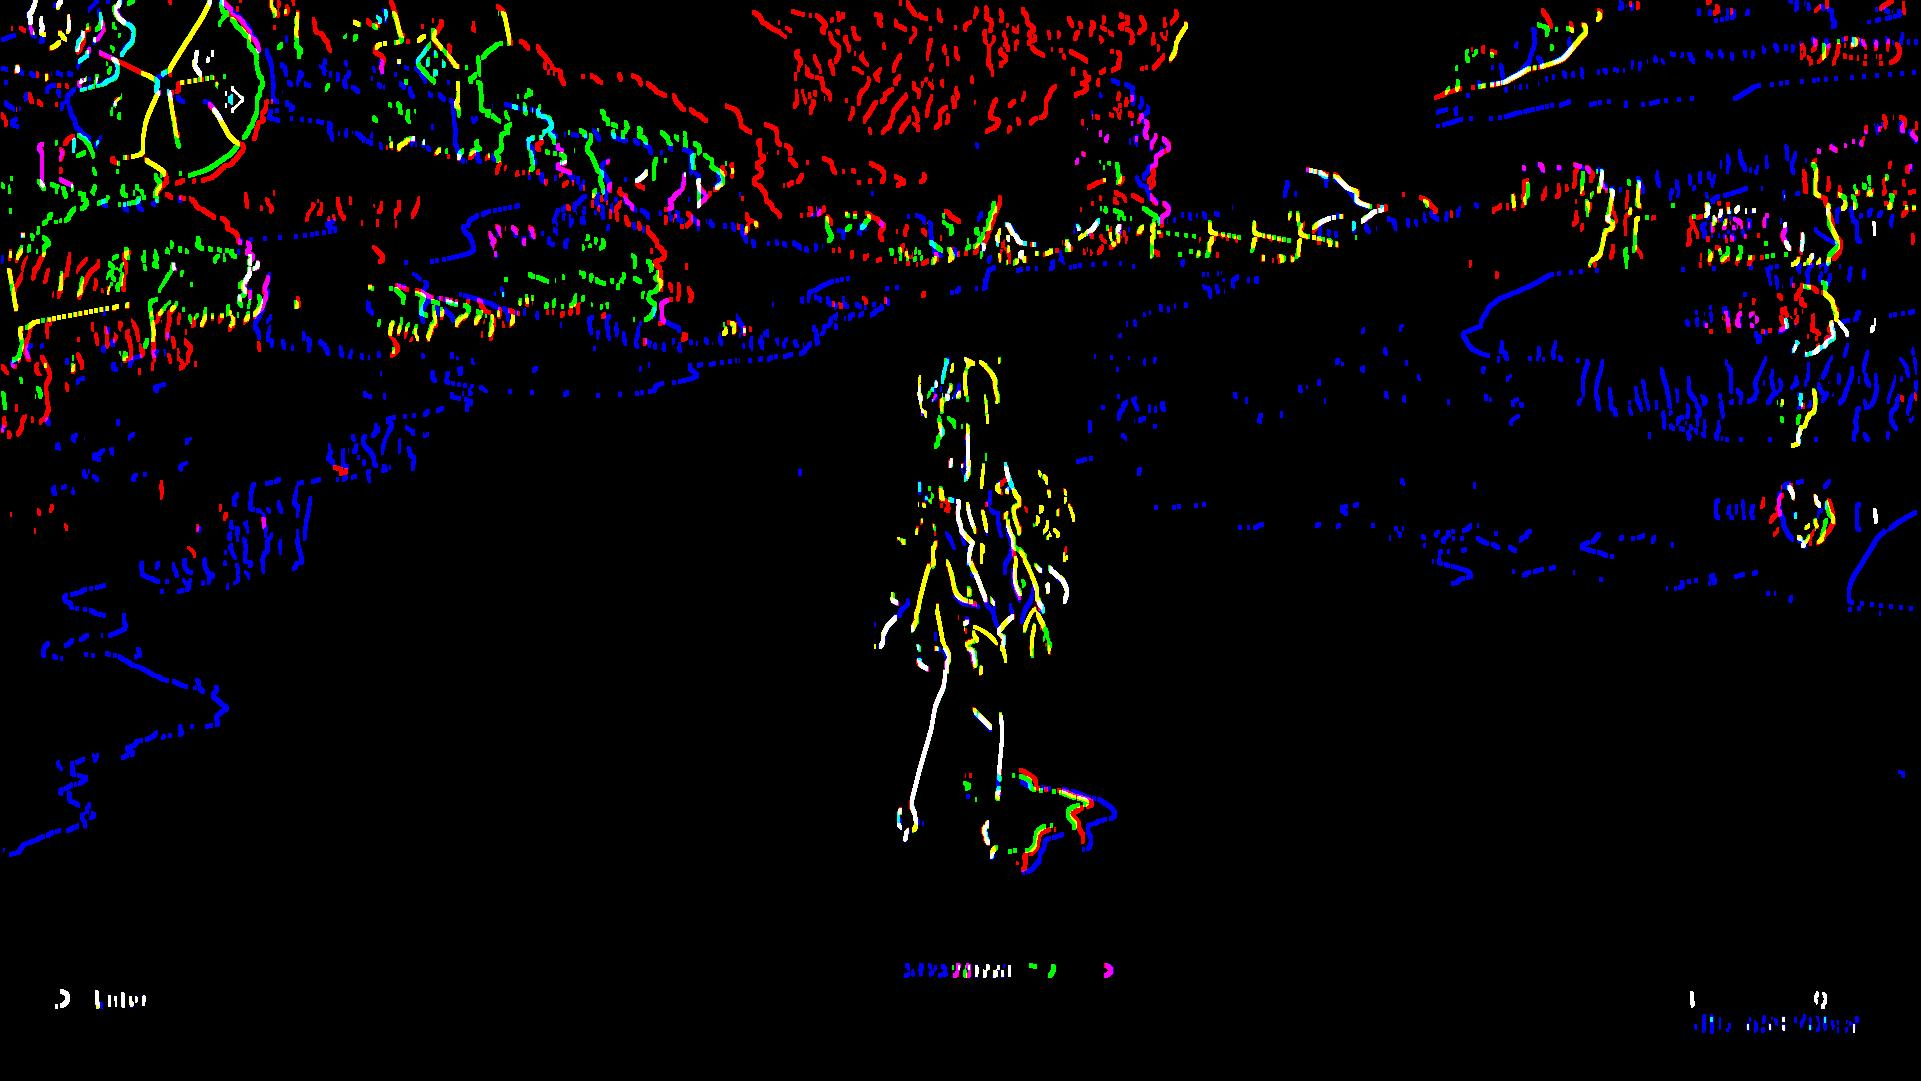

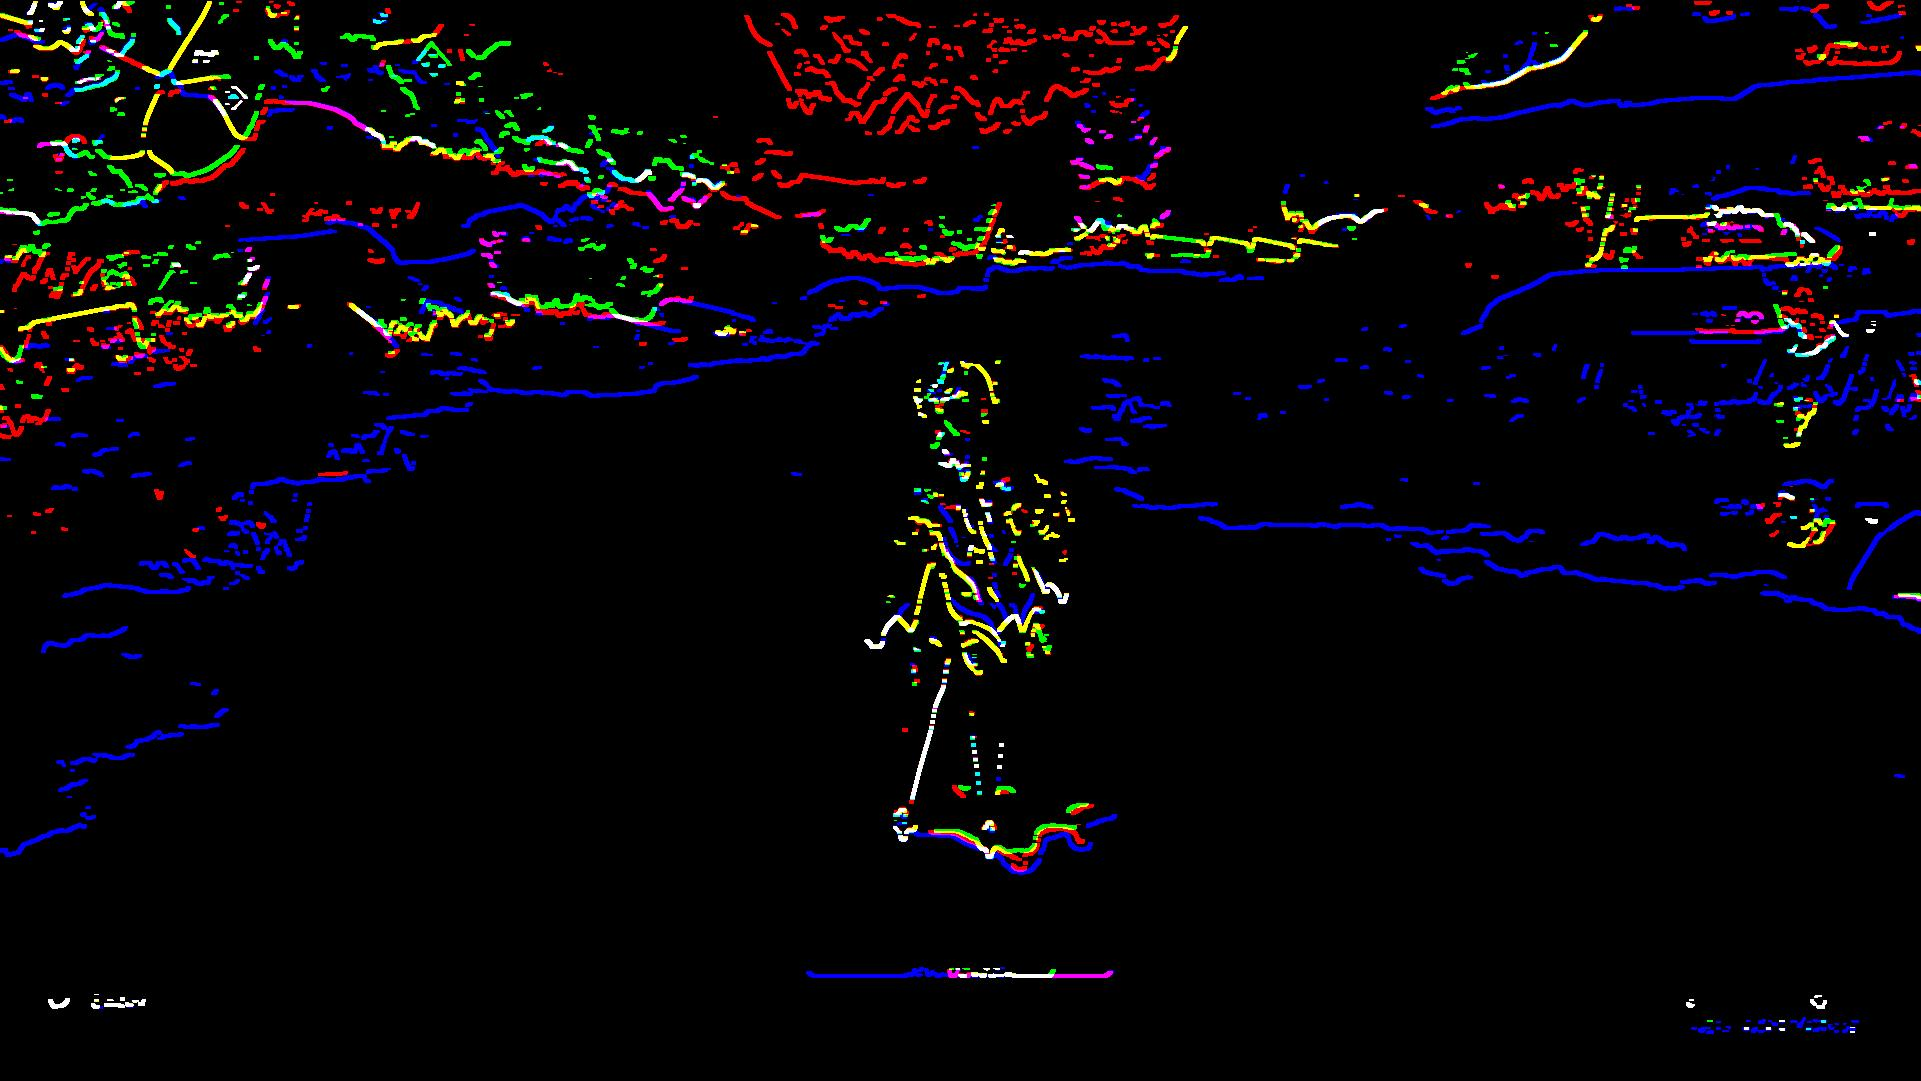

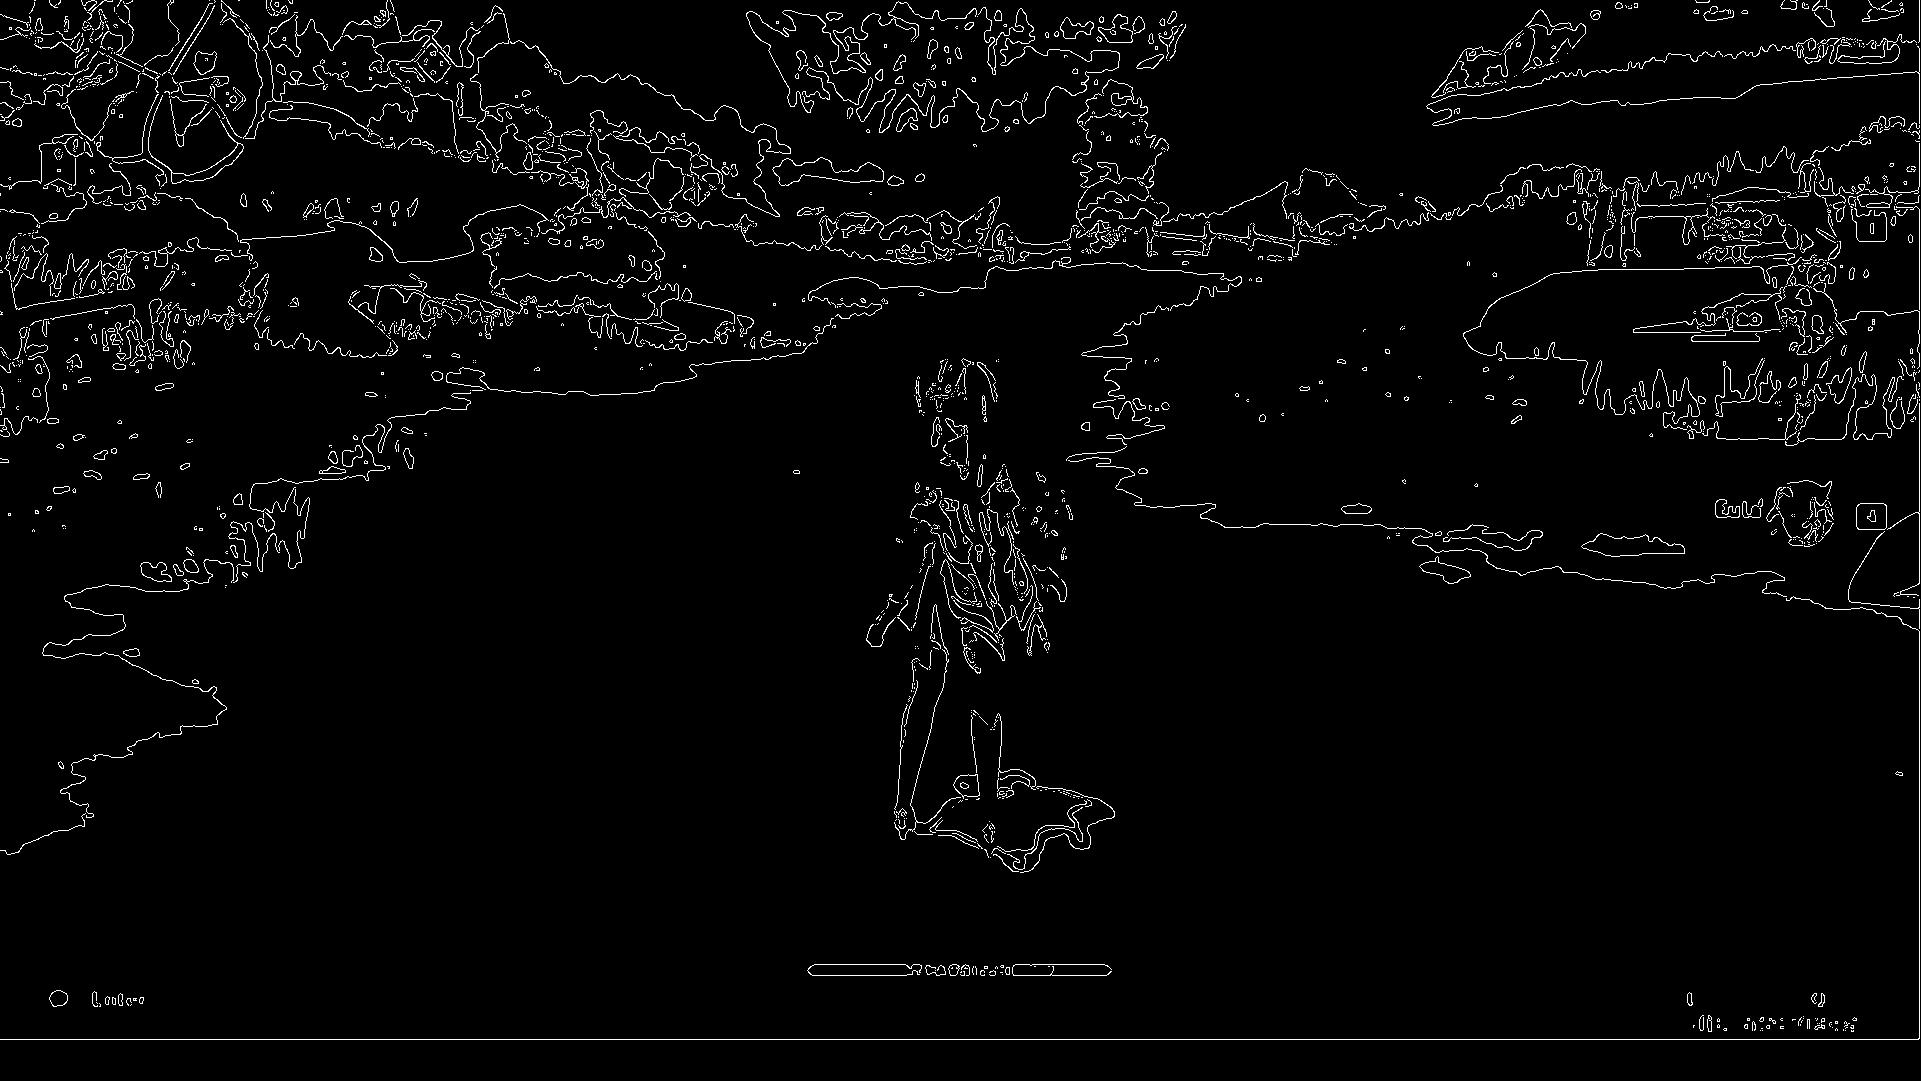

In [9]:
a= cv2.Laplacian(frame,cv2.CV_64F) #Laplacian
x= cv2.Sobel(frame,cv2.CV_64F,1 ,0, ksize=5)#Vertical Gradient
y= cv2.Sobel(frame,cv2.CV_64F,0 ,1, ksize=5) #Horizontal Gradient
edge= cv2.Canny(frame, 100, 200)#Edge Detection
showarray(frame)
showarray(a)
showarray(x)
showarray(y)
showarray(edge)

In [10]:
cv2.imwrite('data_preprocced_2.jpg', y)

True

In [11]:
import cv2
import numpy as np
#read image
src = cv2.imread('data_preprocced_2.jpg', cv2.IMREAD_UNCHANGED)
print(src.shape)

(1081, 1921, 3)


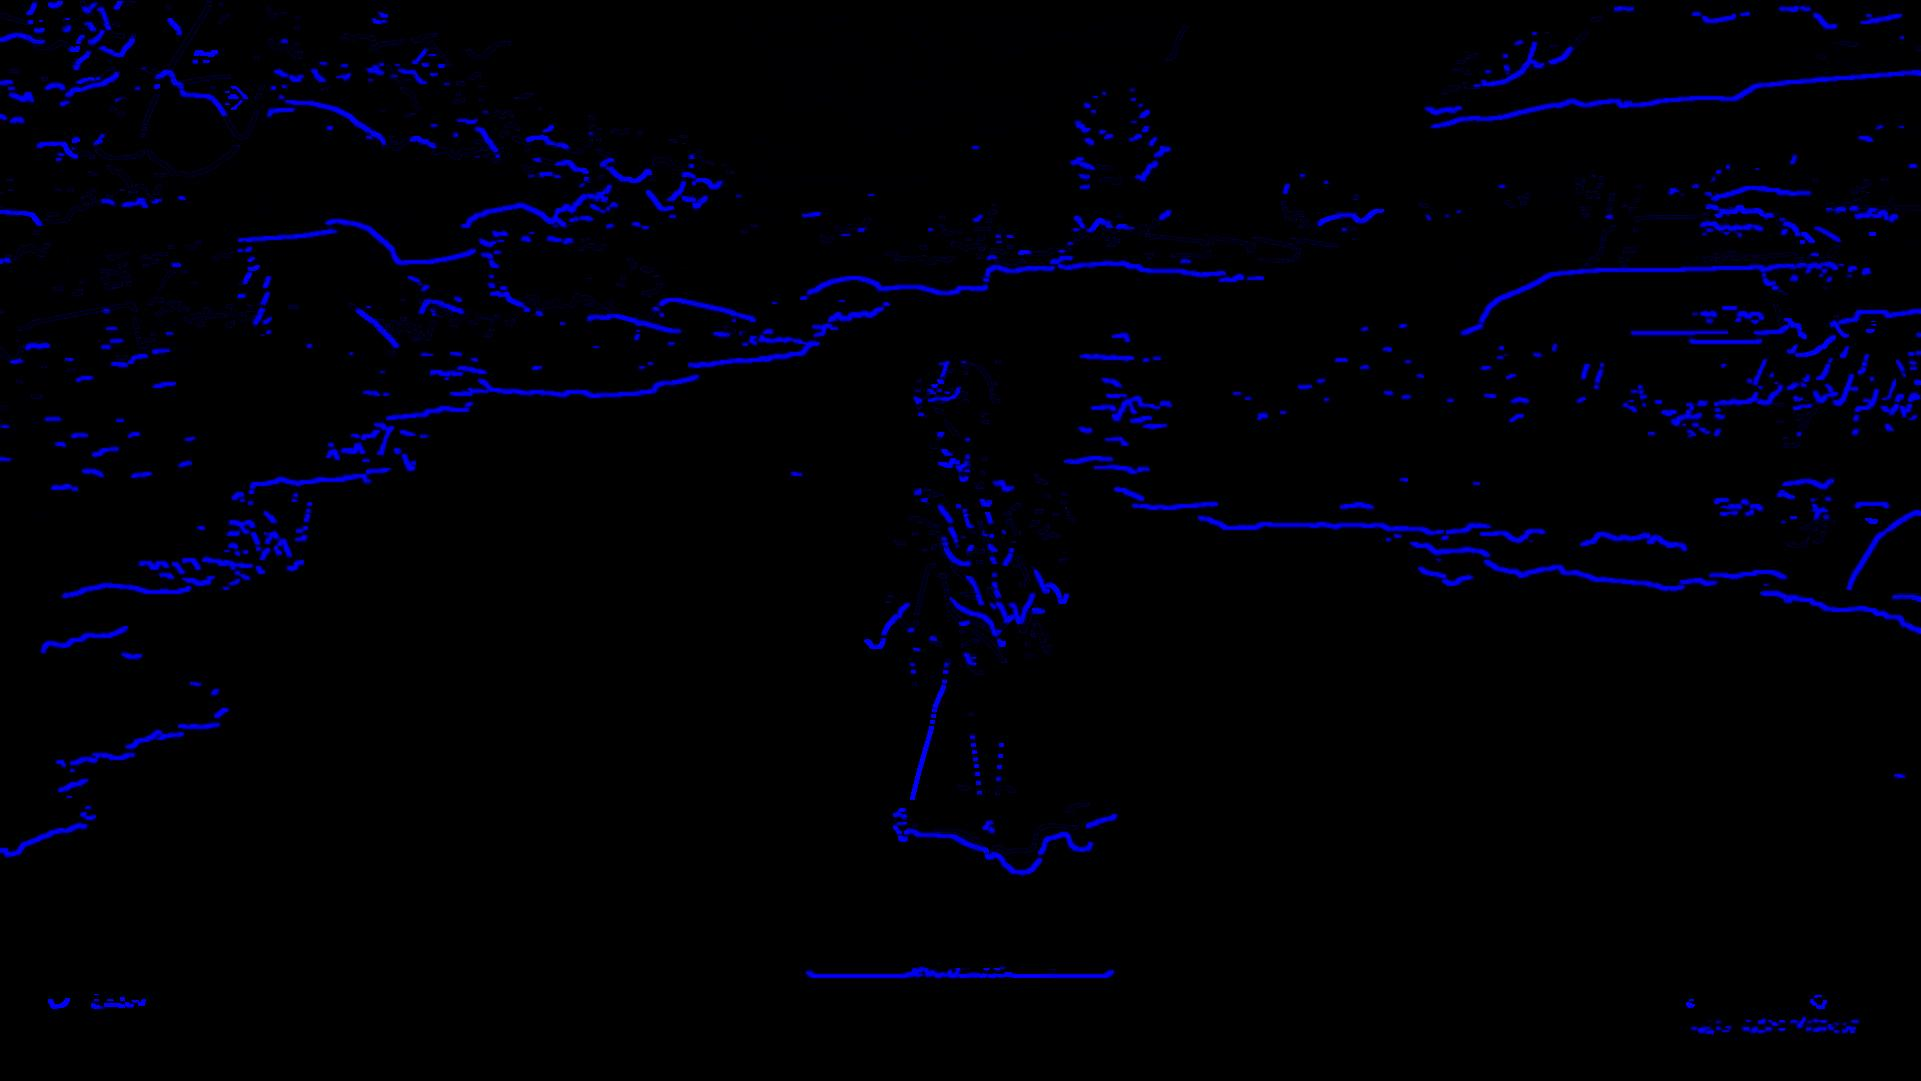

In [21]:
# extract red channel
red_channel = src[:,:,2]
# create empty image with same shape as that of src image
red_img = np.zeros(src.shape)
#assign the red channel of src to empty image
red_img[:,:,2] = red_channel
#save image
cv2.imwrite('cv2-red-channel.png',red_img) 
showarray(red_img)

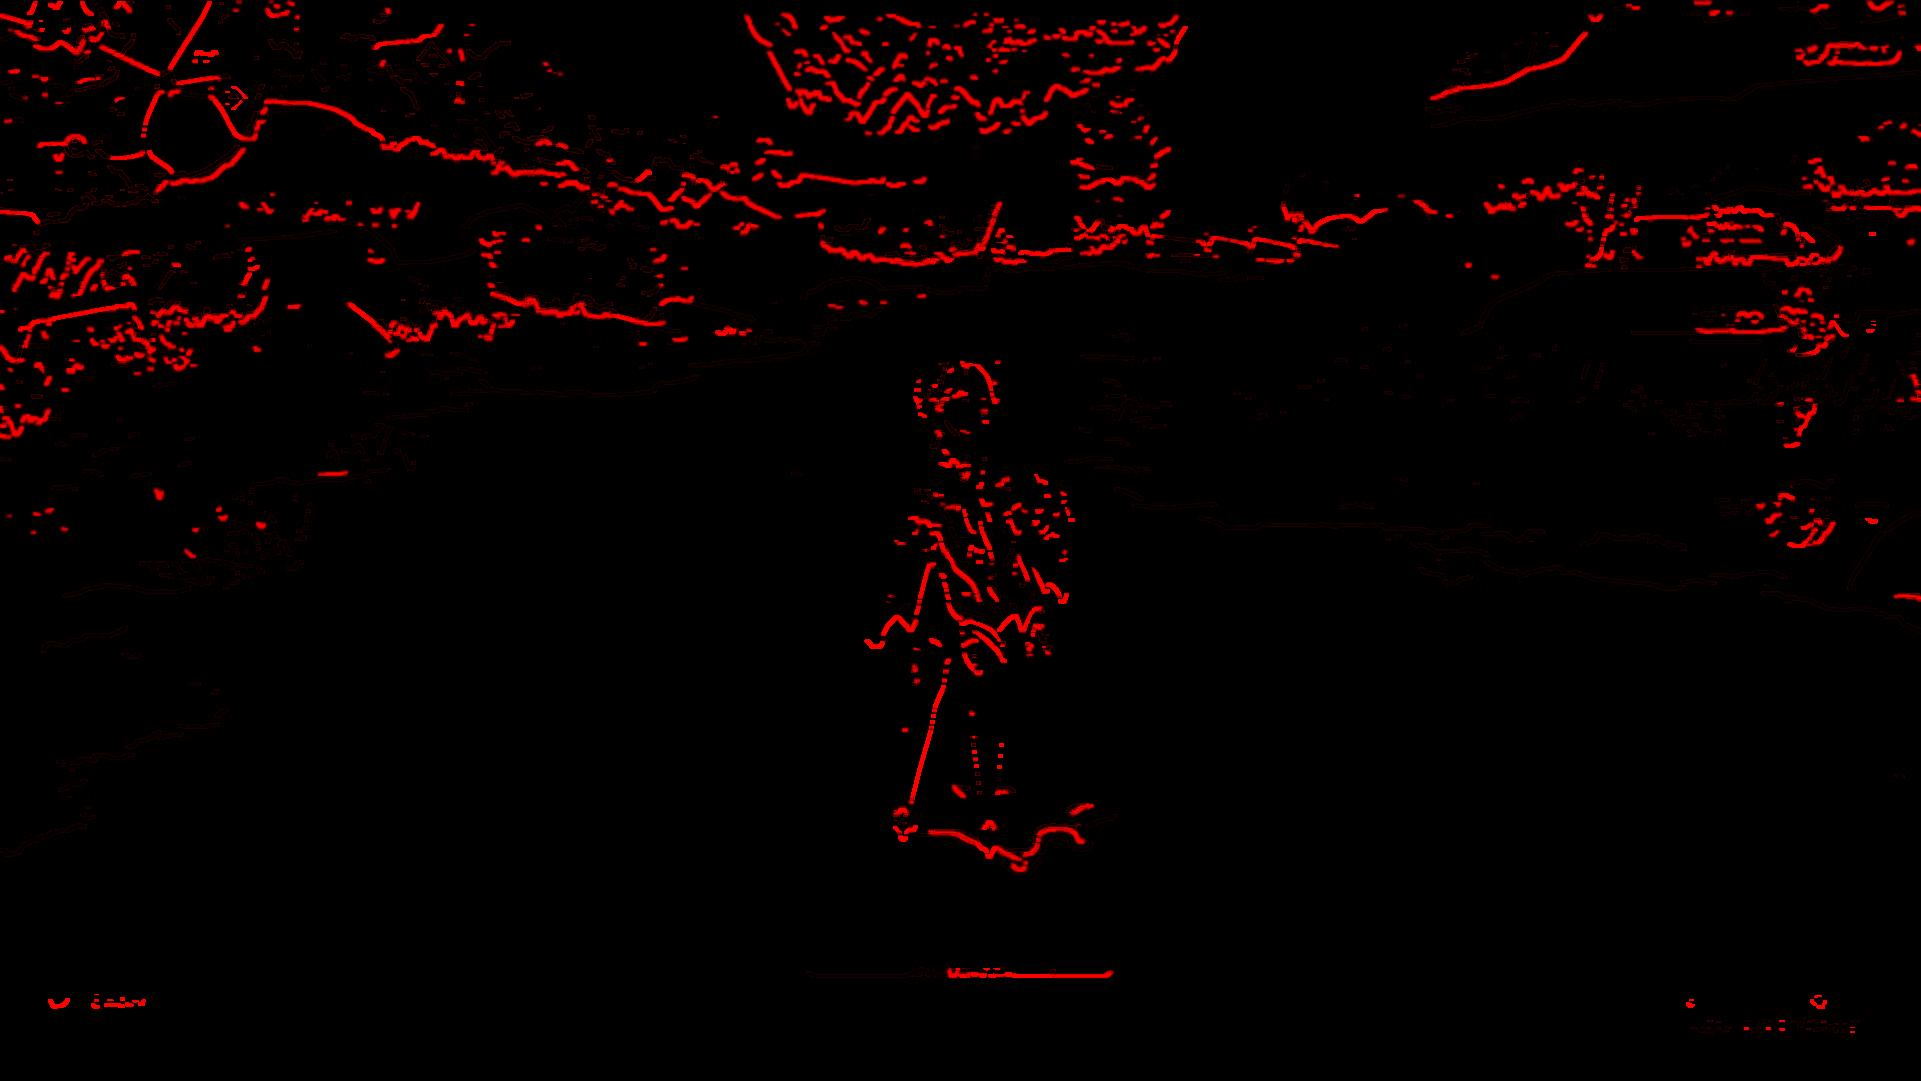

True

In [22]:
# extract blue channel
blue_channel = src[:,:,0]
# create empty image with same shape as that of src image
blue_img = np.zeros(src.shape)
#assign the red channel of src to empty image
blue_img[:,:,0] = blue_channel
#save image
showarray(blue_img)
cv2.imwrite('cv2-blue-channel.png',blue_img) 

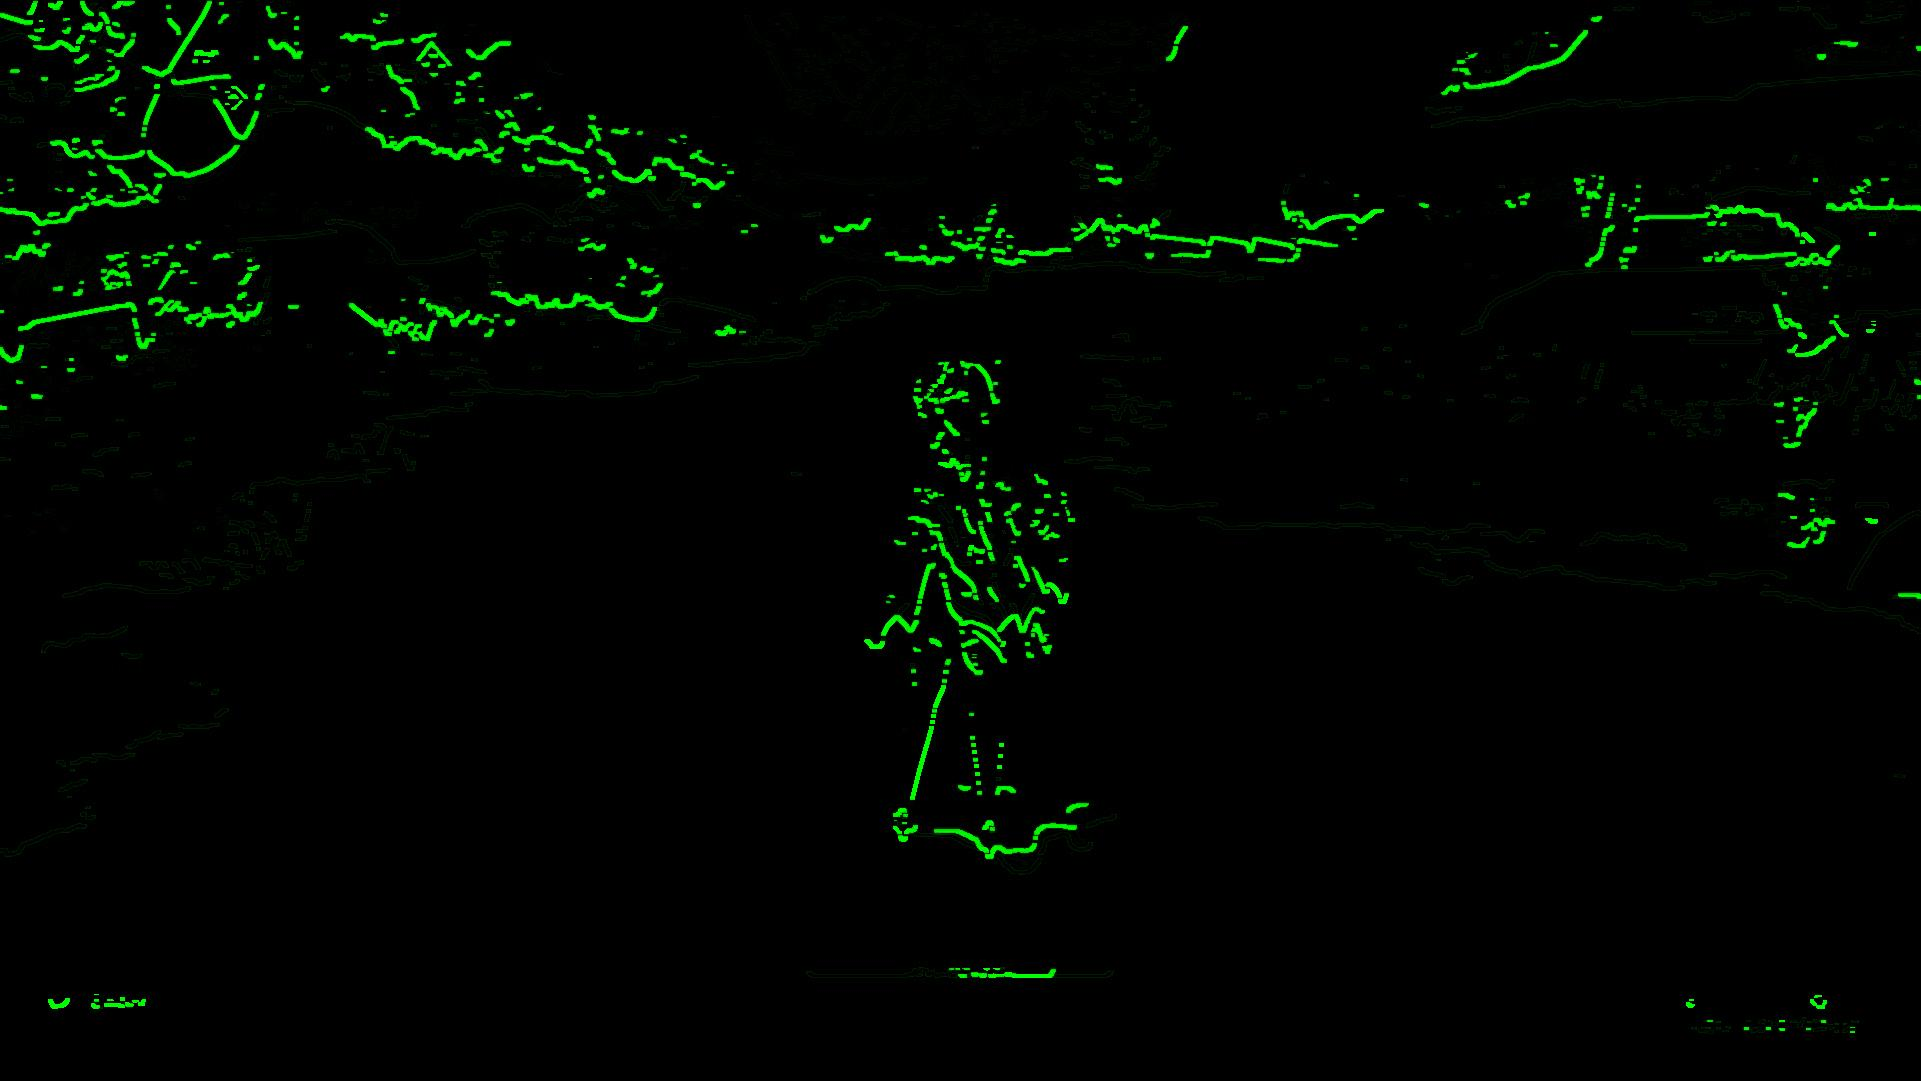

In [20]:
# extract red channel
green_channel = src[:,:,1]
# create empty image with same shape as that of src image
green_img = np.zeros(src.shape)
#assign the red channel of src to empty image
green_img[:,:,1] = green_channel
#save image
cv2.imwrite('cv2-green-channel.png',green_img) 
showarray(green_img)

In [32]:
import cv2 as cv
import numpy as np
from numpy import load
from matplotlib import pyplot as plt
def process_shape(img):
    # Median filter is used to suppress image noise. The edge of the signal can be protected from blurring while noise is filtered out.
    img = cv.medianBlur(img,5)
    # Simple threshold
    ret,th1 = cv.threshold(img,121,255,cv.THRESH_BINARY)
    src= cv2.Sobel(th1,cv2.CV_64F,0 ,1, ksize=5) #Horizontal Gradient
    #print(src.shape)
    # extract red channel
    red_channel = src[:,:,2]
    # create empty image with same shape as that of src image
    red_img = np.zeros(src.shape)
    #assign the red channel of src to empty image
    red_img[:,:,2] = red_channel
    return red_img

In [33]:
img = load('data.npy') #Original

In [34]:
new_shape = process_shape(img)

In [35]:
save('data_prepro3.npy', new_shape)

In [36]:
img = load('data_prepro3.npy')#Original preprocessed

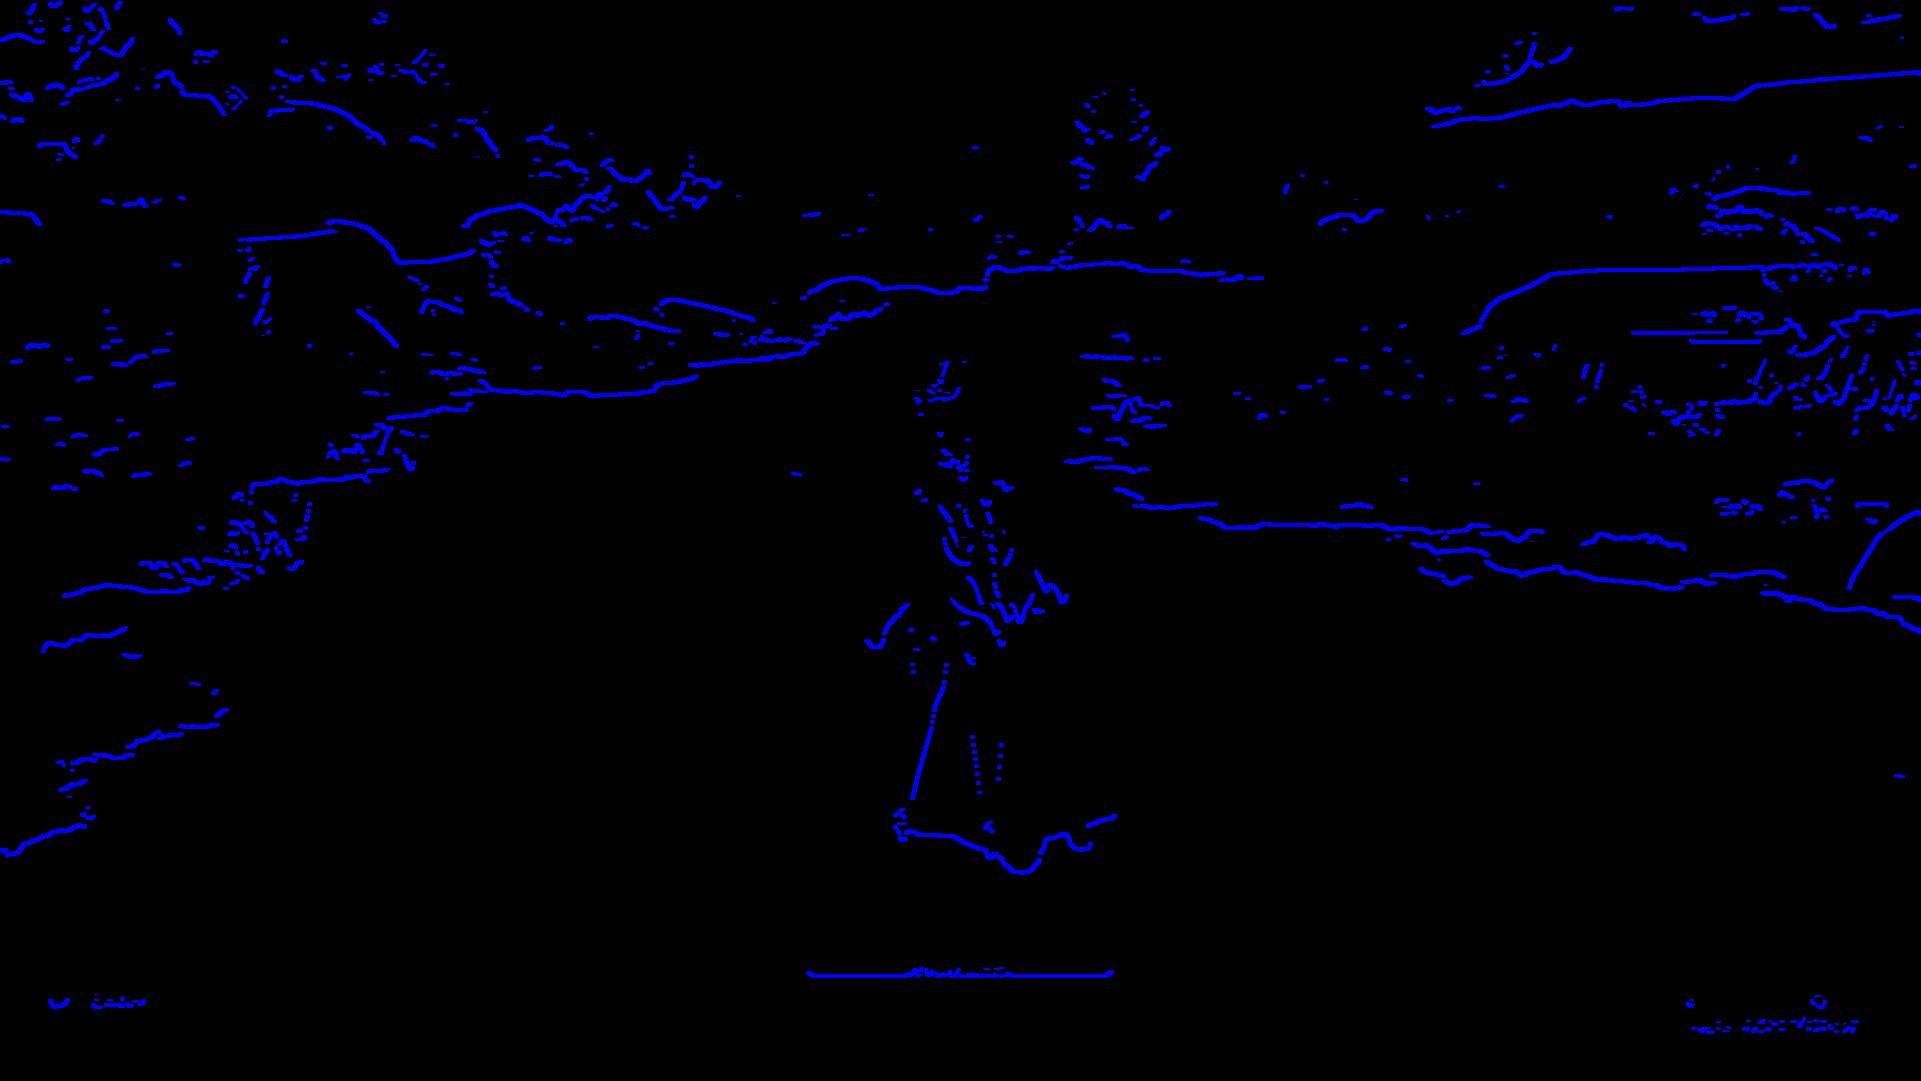

In [37]:
showarray(img)

In [73]:
new_shape = process_shape(image)

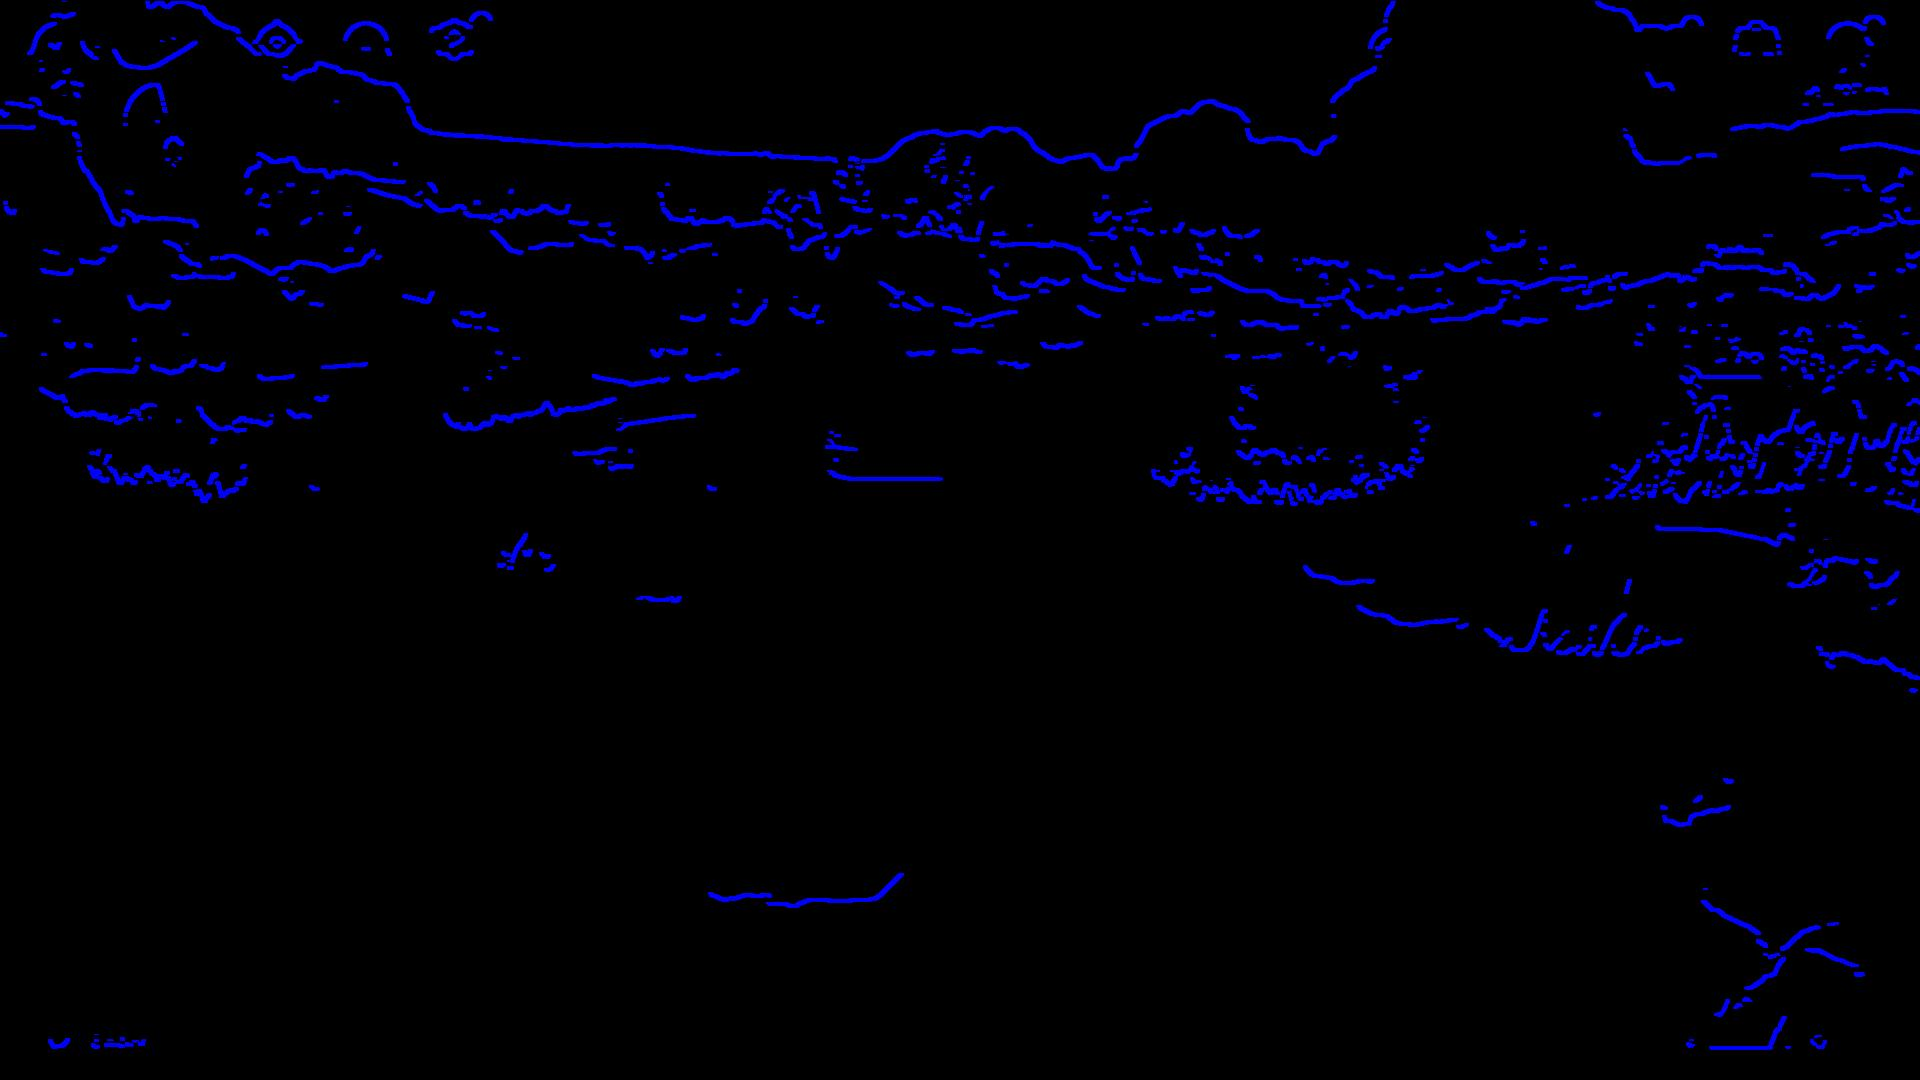

In [74]:
showarray(new_shape)

In [41]:
img = load('data_prepro3.npy')#Original preprocessed2

In [46]:
img = cv2.imread('cv2-red-channel.png', cv2.IMREAD_UNCHANGED)

In [47]:
cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [48]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

[[[ 952  973 1113  973]]

 [[1087  354 1161  359]]

 [[ 279   95  336  106]]

 ...

 [[ 990  513  994  608]]

 [[1700  224 1754  224]]

 [[ 181  567  233  561]]]
(1081, 1921, 3)


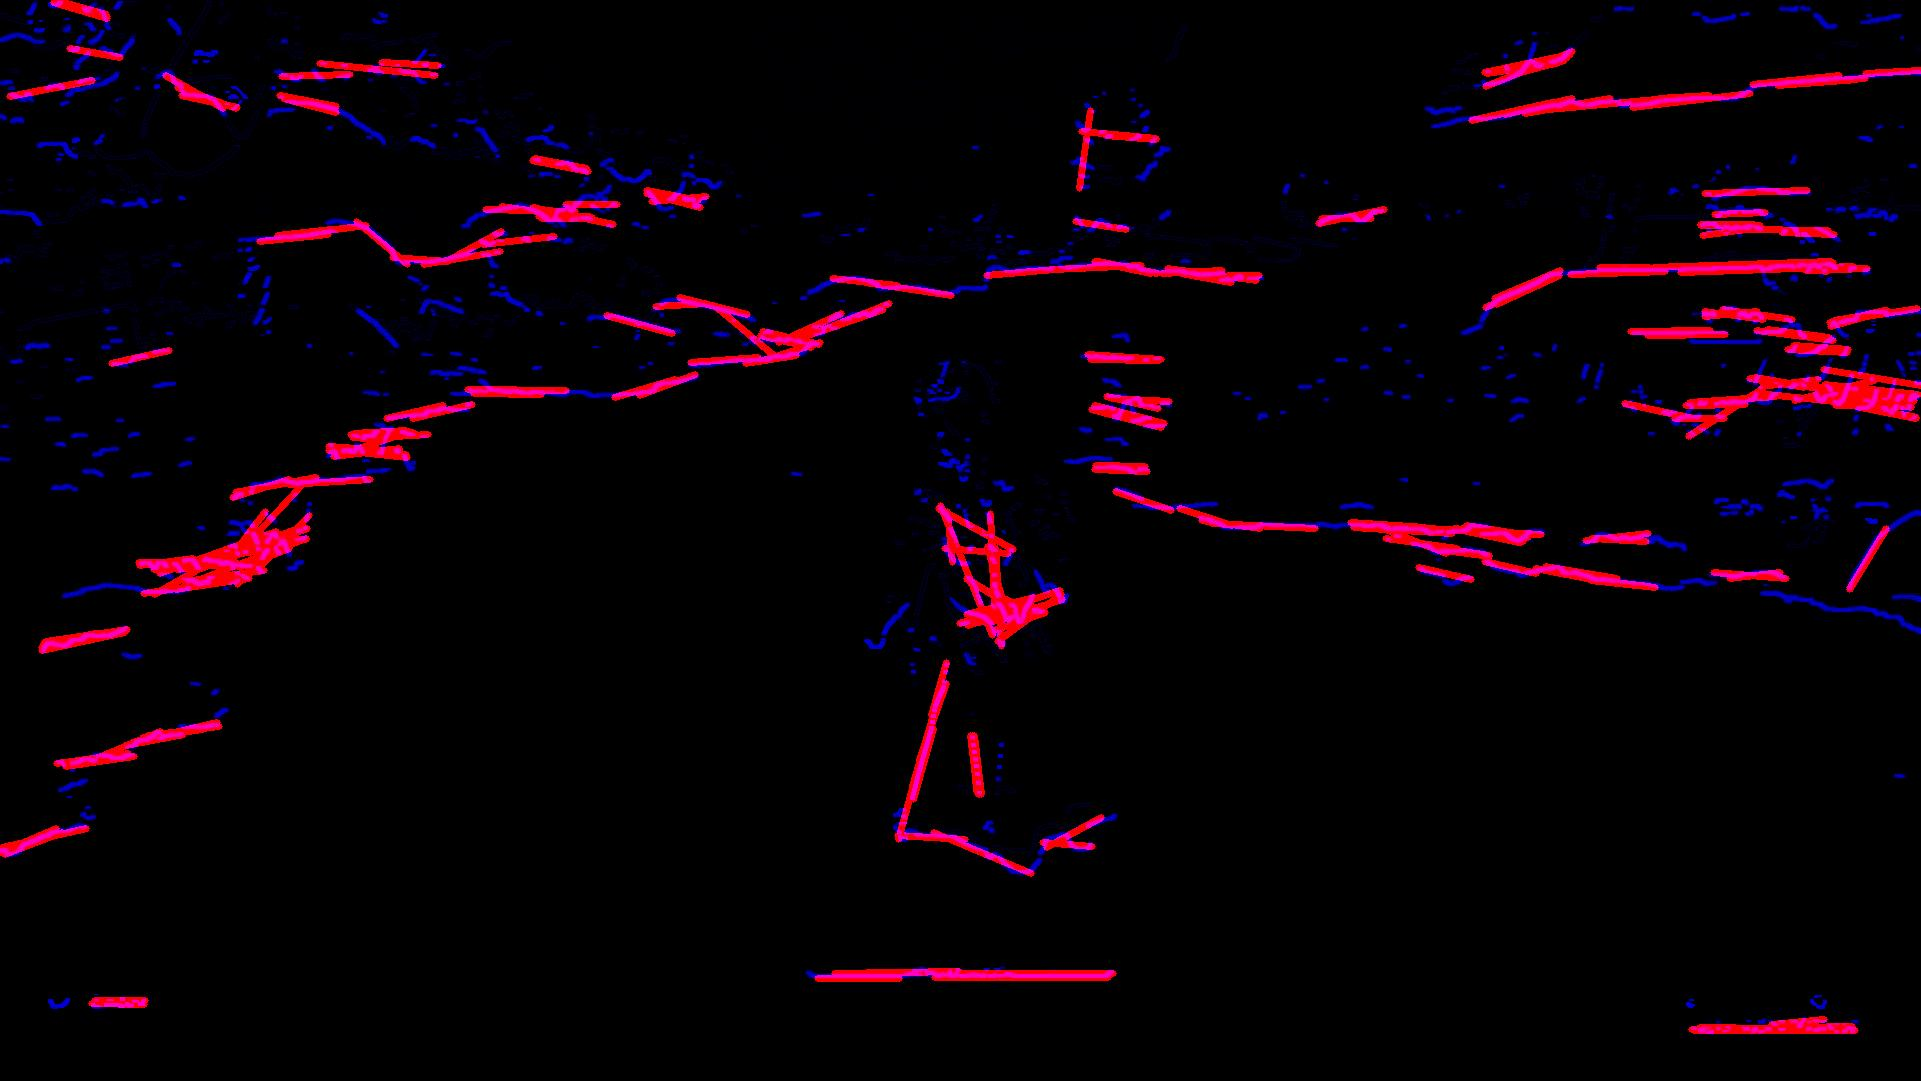

In [49]:

#img = cv2.imread('parking.png')
from numpy import load
# load array
#original_image = load('data.npy')
#img =original_image
#img = load('data_prepro.npy')#Original preprocessed1


kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)
print(lines)
points = []
for line in lines:
    for x1, y1, x2, y2 in line:
        points.append(((x1 + 0.0, y1 + 0.0), (x2 + 0.0, y2 + 0.0)))
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)
print(lines_edges.shape)
#cv2.imwrite('line_parking.png', lines_edges)
showarray(lines_edges)
